# This notebook produces the sentiment bar charts as a function of time 


This notebook will perform the following steps:

1. Read in and process tweets
2. convert tweets into feature vectors
3. Converted tweets are fed into classifiers which then compute the sentiment of the tweets with probabilities
4. A threshold is selected, and tweets with a confidence below this threshold are classified as Neutral. Above this threshold, the sentiments are classified into positive or negative tweets.
5. All tweets are processed and the final graphs are generated


In [1]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')

import collections
import os.path
import sqlite3
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from process_text import clean_up_text
from process_text import preprocess
from process_text import string_cohesion
from process_text import sentiment_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
import pickle
from textblob import TextBlob




#-------------------------------------------------------------------------------
# These are the Parameters for this notebook, set them as desired
#-------------------------------------------------------------------------------
threshold = 0.4
car_companies = ["Porsche","Mercedes","Toyota","Tesla","BMW","Porsche","Ford"]    
time_stamps = ["'%'","'%Aug 01 %'","'%Aug 02 %'","'%Aug 03 %'","'%Aug 04 %'","'%Aug 05 %'","'%Aug 06 %'","'%Aug 07 %'","'%Aug 08 %'","'%Aug 09 %'","'%Aug 10 %'","'%Aug 11 %'","'%Aug 12 %'","'%Aug 13 %'"]
#-------------------------------------------------------------------------------



#--------------------------------------------------------------
# Import the custom stop words
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
#--------------------------------------------------------------

#--------------------------------------------------------------
# Import the vocabulary and generate the vectorizer tranformer
#--------------------------------------------------------------
(A,terms,dict_sample) = joblib.load( "/home/javier/Documents/sentiment_analysis/sentiment_model/articles-raw.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )
print('number of terms: ',len(terms))#print(dic_sample[0:10])
print('Dictionary: ',len(dict_sample))

vectorizer = TfidfVectorizer(stop_words = custom_stop_words,min_df = 20)
A = vectorizer.fit_transform(dict_sample)
print('A: ', A.shape)
#--------------------------------------------------------------


#--------------------------------------------------------------
# We load the trained models
#--------------------------------------------------------------
# The names of the files containing the weights of the model
filename1 = 'lr_sentiment_model.sav'
filename2 = 'nb_sentiment_model.sav'

# Now we load in the trained models
loaded_lr = pickle.load(open(filename1, 'rb'))
loaded_nb = pickle.load(open(filename2, 'rb'))
#--------------------------------------------------------------


conn = sqlite3.connect('keyword_based_database.db')

q_ford='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
'''

q_toyota='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
'''


q_mercedes='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
'''

q_bmw='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
'''

q_porsche='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
'''

q_tesla='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) LIKE '%model%'
AND LOWER(tweet_text) NOT LIKE '%elon%'
AND LOWER(tweet_text) NOT LIKE '%musk%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND LOWER(tweet_text) NOT LIKE '%stock%'
AND LOWER(tweet_text) NOT LIKE '%production rate%'
AND LOWER(tweet_text) NOT LIKE '%money model%'
AND LOWER(tweet_text) NOT LIKE '%industry%'
AND LOWER(tweet_text) NOT LIKE '%net loss%'
AND LOWER(tweet_text) NOT LIKE '%loss%'
AND LOWER(tweet_text) NOT LIKE '%profit%'
AND LOWER(tweet_text) NOT LIKE '%atari%'
AND LOWER(tweet_text) NOT LIKE '%financial%'
AND LOWER(tweet_text) NOT LIKE '%earn%'
AND LOWER(tweet_text) NOT LIKE '%quarterly%'
AND LOWER(tweet_text) NOT LIKE '%record%'
AND LOWER(tweet_text) NOT LIKE '%market%'
AND LOWER(tweet_text) NOT LIKE '%outsell%'
AND LOWER(tweet_text) NOT LIKE '%produce%'
AND LOWER(tweet_text) NOT LIKE 'second-quarter'
AND LOWER(tweet_text) NOT LIKE 'invest'
'''

q_tesla='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
'''

x_labels = [time_stamps[k].replace("%", "").replace("'","") for k in range(1,len(time_stamps))]

print('Time Stamps: ', x_labels)

[nltk_data] Downloading package wordnet to /home/javier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/javier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/javier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Loaded 3500 X 2444 document-term matrix
number of terms:  2444
Dictionary:  8750
A:  (8750, 2444)
Time Stamps:  ['Aug 01 ', 'Aug 02 ', 'Aug 03 ', 'Aug 04 ', 'Aug 05 ', 'Aug 06 ', 'Aug 07 ', 'Aug 08 ', 'Aug 09 ', 'Aug 10 ', 'Aug 11 ', 'Aug 12 ', 'Aug 13 ']



SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.5719322990126939

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.6116504854368932

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

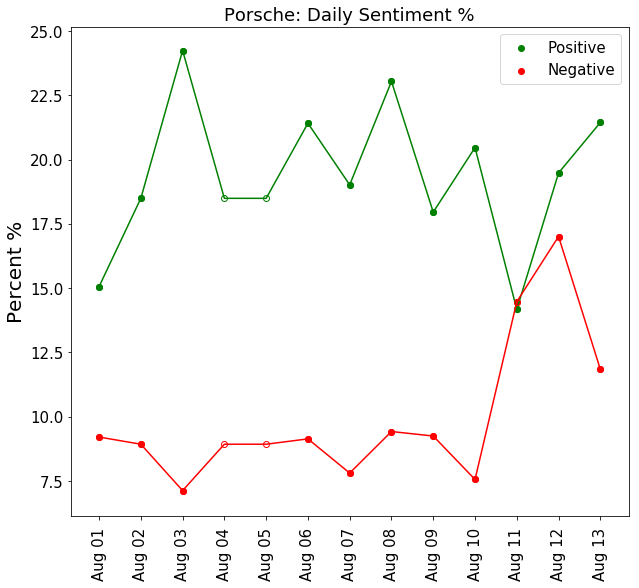


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7184 

Fraction removed:  0.677
Total Sample:  7184
Neg/Pos ratio:  0.6258802816901409

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  1.0824742268041236

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  892 

Fraction removed:  0.553
Total Sample:  892
Neg/Pos ratio:  0.9076923076923077

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  0.7419354838709677

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND cre

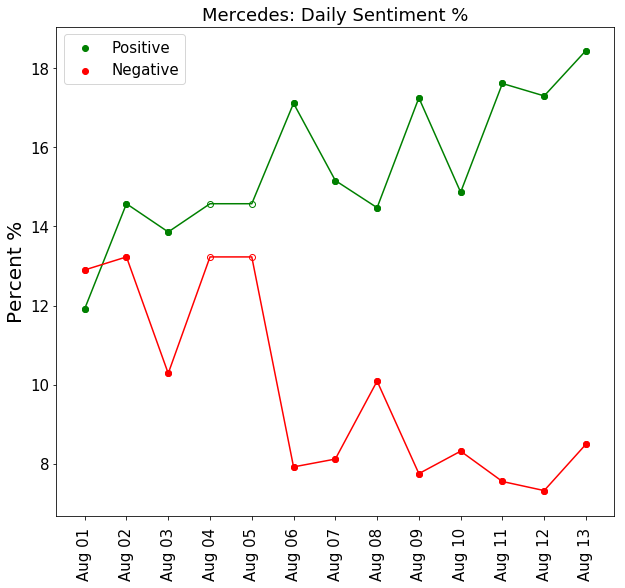


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.30592841163310963

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.32941176470588235

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.29411764705882354

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.31958762886597936

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'

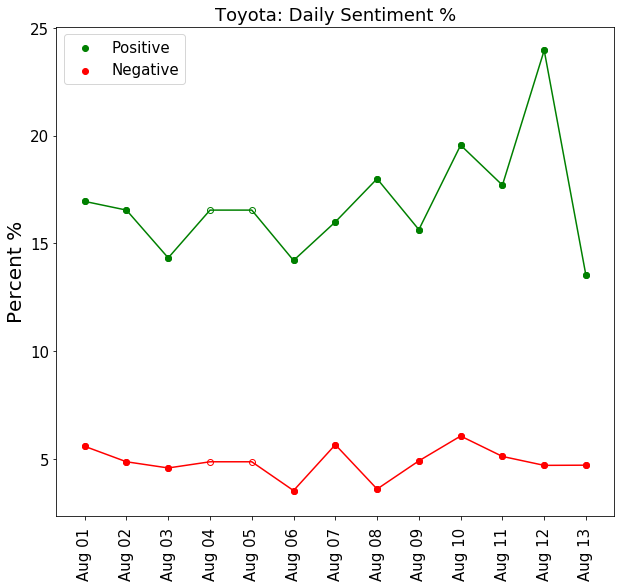


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46812 

Fraction removed:  0.704
Total Sample:  46812
Neg/Pos ratio:  1.2262735519888346

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  1.4034682080924856

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  1.2946058091286308

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after

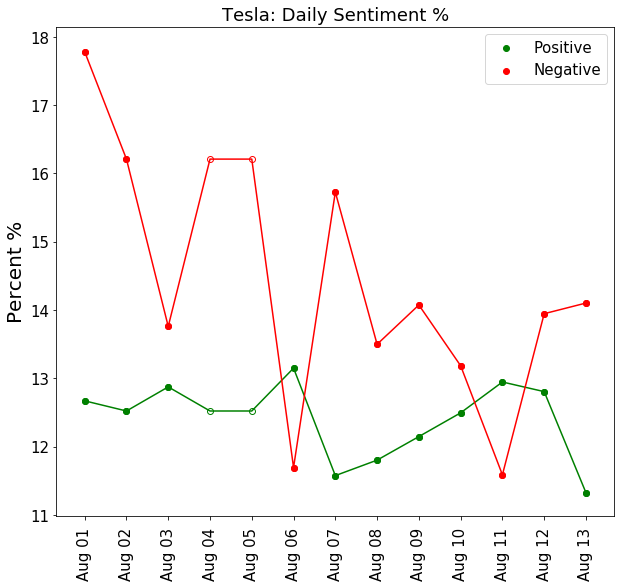


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.38980716253443526

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.4095238095238095

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.4975609756097561

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing dupli

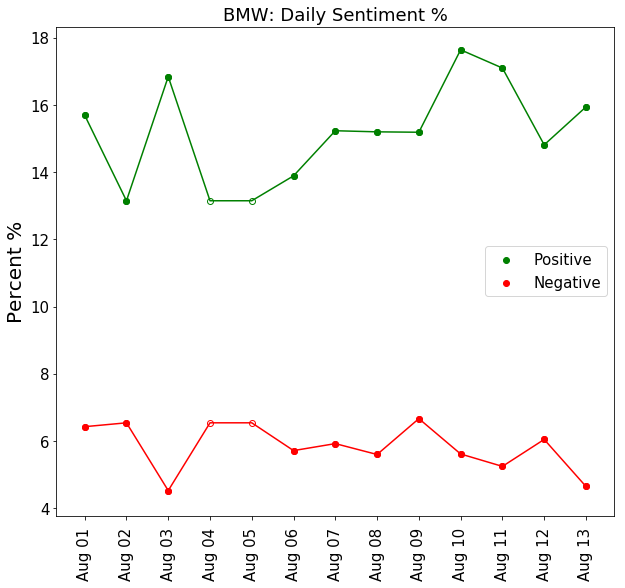


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.5719322990126939

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.6116504854368932

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

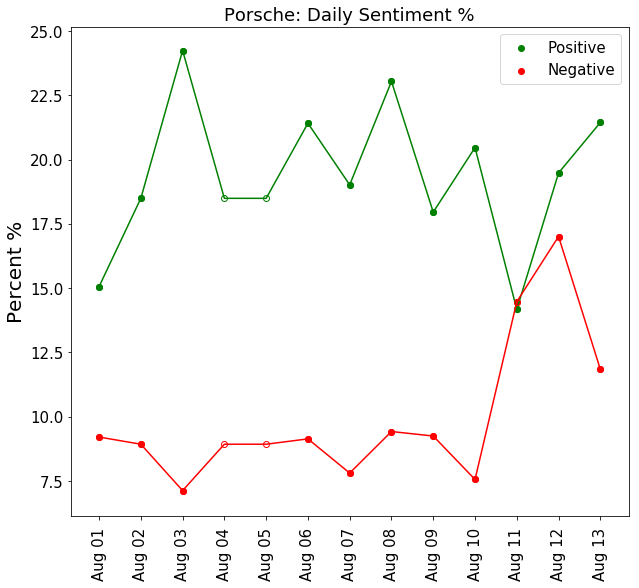


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27921 

Fraction removed:  0.507
Total Sample:  27921
Neg/Pos ratio:  0.5377755759227149

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE 



The number of tweets after removing duplicates:  4247 

Fraction removed:  0.5
Total Sample:  4247
Neg/Pos ratio:  0.4744645799011532

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4091 

Fraction removed:  0.404
Total Sample:  4091
Neg/Pos ratio:  0.5176470588235295

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(twee

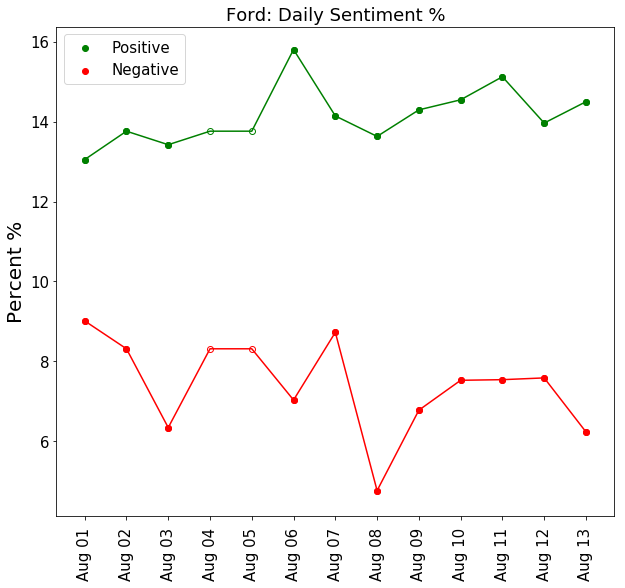

In [2]:
for car_company in car_companies:

    if(car_company=="Toyota"):
        q = q_toyota
    elif(car_company=="Ford"):
        q= q_ford
    elif(car_company=="Mercedes"):
        q=q_mercedes
    elif(car_company=="BMW"):
        q=q_bmw
    elif(car_company=="Porsche"):
        q=q_porsche
    elif(car_company=="Tesla"):
        q=q_tesla



    pos_sentiment = []
    neg_sentiment = []
    neutral_sentiment = []

    daily_total = []
    daily_neutral=[]
    daily_pos=[]
    daily_neg=[]


    # Loop over all dates that we are looking at
    for date in time_stamps:

        q_time = q+"AND created_at LIKE "+ date +" \n "

        print(q_time)

        df = pd.read_sql_query(q_time,conn)

        N_raw_tweets = len(df)

        percents = [-1.0,-1.0,-1.0]
        total_number = -1.0

        if(N_raw_tweets != 0):


            # Apply the 'Clean-up-text function to all tweets in the data frame'
            df['tweet_text'] = df['tweet_text'].apply(clean_up_text)


            # Remove duplicate tweets and reset the index
            df.drop_duplicates(subset='tweet_text', keep='first', inplace=True)
            df=df.reset_index(drop=True)

            N_processed_tweets = len(df)

            print('\n')
            print('=============================================================')
            print('The number of tweets after removing duplicates: ', N_processed_tweets ,'\n')
            print('Fraction removed: ', round(1.0-(N_processed_tweets/float(N_raw_tweets)),3) )
            print('=============================================================')


            sentiment_pred = []
            sentiment_prob = []

            for k in range(0,len(df)):
                sample_text = df['tweet_text'][k]
                pred,prob = sentiment_model(sample_text,threshold,vectorizer, loaded_lr,loaded_nb)
                sentiment_pred.append(pred)
                sentiment_prob.append(prob)

            matplotlib.rcParams['figure.figsize'] = 10, 9
            matplotlib.rcParams['font.size'] = 15

            # Count the various sentiments
            m_count= collections.Counter(sentiment_pred)

            size_model=[m_count[0],m_count[1],m_count[-1]]

            # Compute the total numbers
            total_number = np.sum(size_model)

            # Compute the Percentages
            percents = (np.asarray([m_count[0],m_count[1],m_count[-1]])/total_number)*100.0

            print("Total Sample: ",total_number)
            print("Neg/Pos ratio: ", m_count[-1]/m_count[1])

            # Create a circle for the center of the plot
            my_circle=plt.Circle( (0,0), 0.6, color='white')


            # create data
            names='Neutral: '+str(int(percents[0]))+"%",'Positive: '+str(int(percents[1]))+"%", 'Negative: '+str(int(percents[2]))+"%"

            # Give color names
            plt.clf()
            plt.title(car_company+" : "+date.replace("%", "").replace("'",""),size=30)
            plt.pie(size_model, labels=names, colors=['lightgrey','green','red'])
            p=plt.gcf()
            p.gca().add_artist(my_circle)
            plt.savefig("output/"+car_company+"_"+date.replace("%", "").replace("'","").replace(" ","_")+".pdf",bboxes="tight")


        # Save the Daily values of positive and negative sentiments
        daily_total.append(total_number)
        daily_neutral.append(percents[0])
        daily_pos.append(percents[1])
        daily_neg.append(percents[2])


    #==========================================================================================================
    # Write put all of the Data to a file
    filename = "output/"+car_company+"_daily_data.txt"
    file = open(filename, "w")

    s = "Time_Stamp"+"      "+"Daily_Total "+"       "+"Daily_pos"+"    "+"Daily_neg"+"    "+"Daily_neutral"+"\n"
    file.write(s)

    for k in range(len(daily_pos)):
        s = time_stamps[k].replace("%", "").replace("'","")+str(daily_total[k])+" "+str(daily_pos[k])+" "+str(daily_neg[k])+" "+str(daily_neutral[k])+"\n"
        file.write(s)

    file.close()
    #==========================================================================================================

    #==========================================================================================================
    # Fill in Missing Values:
    
    # Remove the first entry which is full set
    daily_pos =  daily_pos[1:]
    daily_neg = daily_neg[1:]
    daily_neutral = daily_neutral[1:]

    mean_pos = daily_pos[daily_pos!=-1.0].mean()
    mean_neg = daily_neg[daily_neg!=-1.0].mean()
    mean_neutral = daily_neutral[daily_neutral!=-1.0].mean()
    
    # Initialize the index
    x_indx =[]
    y_pos =[]
    y_neg = []
    y_neu =[]
    
    # The Full index range 0-> set length
    x_full_indx =range(0,len(daily_neg))

    for k in range(len(daily_neg)):
        dpos = daily_pos[k]
        dneg = daily_neg[k]
        dneu = daily_neutral[k]

        # replace the missing values with the mean values of the array
        if(dpos==-1.0):
            daily_pos[k] = mean_pos
            daily_neg[k] = mean_neg
            daily_neutral[k] = mean_neutral
        else:
            x_indx.append(k)
            y_pos.append(dpos)
            y_neg.append(dneg)
            y_neu.append(dneu)


    #==========================================================================================================
    # Plot the Data and save the file
    plt.clf()
    plt.title(car_company+": Daily Sentiment %")
    plt.ylabel("Percent %",size=20)
    plt.plot(daily_pos,"-o",c="g", mfc='none')
    plt.scatter(x_indx,y_pos,c='g',marker='o',label="Positive",)
    plt.plot(daily_neg,"-o",c="r", mfc='none')
    plt.scatter(x_indx,y_neg,c='r',marker='o',label="Negative")
    plt.xticks(x_full_indx, x_labels, rotation='vertical')
    plt.legend()
    plt.savefig("output/"+car_company+"_Daily_Sentiment"+".pdf")
    plt.show()